# A4 [86 points]

Complete the worksheet given by this notebook and associated layers.py, fc_net.py, and solver.py files.

**Due: December 5, 2024**

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.
  

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Affine layer: forward
**[4 pts]**  Open the file `cs231n/layers.py` and implement the `affine_forward` function.


$$ f(x; W, b) = Wx+b$$

Once you are done you can test your implementaion by running the following:

In [3]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


# Affine layer: backward
**[6 pts]** Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

Remember that $\frac{\partial f(x; W,b)}{\partial x}$, $\frac{\partial f(x; W,b)}{\partial W}$, and, $\frac{\partial f(x; W,b)}{\partial b}$ have the same dimensions than $x$, $W$, and $b$, respectively. 

So, for example, as $x$ is dimension $N\times D$, $W$ is dimensions $D\times M$  and the upstream gradient (`dout`) is dimension $N\times M$, $\frac{\partial f(x; W,b)}{\partial x} = dout \cdot W^{T}$


In [4]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
**[4 pts]** Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

**Hint**: The numpy function `np.maximum(a,x)` compares each element of x with a, and returns the max value https://numpy.org/doc/stable/reference/generated/numpy.maximum.html

In [5]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
**[5 pts]** Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

$$ \frac{\partial Relu(z)}{\partial z}=\begin{cases}
			0, & \text{if $z < 0 $ }\\
            1, & \text{otherwise}
		 \end{cases} $$

In [6]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


## Inline Question 1: 

**[8 pts]** We've only asked you to implement ReLU, but there are a number of different activation functions that one could use in neural networks, each with its pros and cons. In particular, an issue commonly seen with activation functions is getting zero (or close to zero) gradient flow during backpropagation. Which of the following activation functions have this problem? If you consider these functions in the one dimensional case, what types of input would lead to this behaviour?
1. Sigmoid
2. ReLU
3. Leaky ReLU

## Answer:

Both the Sigmoid Activation function and ReLU can face the problem of getting the values of activation functions as zero or close to zero. Although Leaky ReLU can also face this problem but it can be avoided easily.

Types of Input that lead this behavior for each of the functions:

1. Sigmoid:
    - As we know, the sigmoid function is: $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$ and its derivative is: $$ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$
    - So, whenever the inputs are either large positive or large negative, the derivative always tends to be close to 0, causing the problem of vanishing gradients.
    - To deal with this problem, we often perform normalization of the inputs, but even with that, if we have a very deep neural network, the problem of vanishing or exploding gradients is a possibility.

2. ReLU:
    - The ReLU function is: $$ \text{ReLU}(x) = 
                                \begin{cases} 
                                x & \text{if } x > 0, \\
                                0 & \text{if } x \leq 0.
                                \end{cases} $$
        and, its derivative is: $$ \text{ReLU}'(x) = 
                                \begin{cases} 
                                1 & \text{if } x > 0, \\
                                0 & \text{if } x \leq 0.
                                \end{cases} $$
   - So, many times it is possible that the neurons which have 0 gradient, i.e., not passed or are inactive can result in zero gradients.
   - This can also lead to stagnation of the weights.
   - The values of x that cause these are x<=0, i.e., any negative input values.

3. Leaky ReLU
    - The Leaky Relu function is: $$ \text{Leaky ReLU}(x) = 
                                    \begin{cases} 
                                    x & \text{if } x > 0, \\
                                    \alpha x & \text{if } x \leq 0,
                                    \end{cases} $$
      and, its derivative is: $$ \text{Leaky ReLU}'(x) = 
                                \begin{cases} 
                                1 & \text{if } x > 0, \\
                                \alpha & \text{if } x \leq 0.
                                \end{cases} $$
   - Thus, there is a huge dependency on the value of alpha, as the Leaky ReLU won't suffer from a 0 gradient only on the basis of the input x but also, if its value of alpha is very low.
   - The worst case scenario that'd cause the activation function values being close to 0 is when the inputs have negative values and alpha is very small.
   - So although Leaky ReLU rarely encounters the problem of activation fn values close to 0, it can be managed by manually setting the value of alpha on a higher end.

# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `cs231n/layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [7]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


# Dropout
**[10 pts]** Implement the functions `dropout_forward` and `dropout_backward` in the file `cs231n/layer_utils.py`.

For the forward step, implement the inverted dropout, so that the predict function does not required any adjusting. So, remember to include the scaling factor in the mask.

For the backward step, you  need to multply the upstream gradient with the mask used on the forward step.

$$
\frac{\partial L}{\partial h(t+1)} \cdot \frac{\partial h(t+1)}{\partial h(t)} = \frac{\partial L}{\partial h(t+1)} \ast \text{mask}
$$


# Loss layers: Softmax 
**[5 pts]** Now implement the loss for softmax in the `softmax_loss` function in `cs231n/layers.py`.
You can make sure that the implementations are correct by running the following:

In [8]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)


dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


# Two-layer network
**[15 pts]** Open the file `cs231n/classifiers/fc_net.py` and complete the implementation of the `TwoLayerNet` class. Read through it to make sure you understand the API. You can run the cell below to test your implementation.

To initialize a matrix of weights, you need to use the recommended initialization for Relu activation functions ($2/sqrt(D_{in})$)

For the forward and backpropagation steps, you can call the previously developed functions of the class `layers`:

* `affine_forward` and `affine_backward`
* `relu_forward` and `relu_backward`
* `softmax_loss`


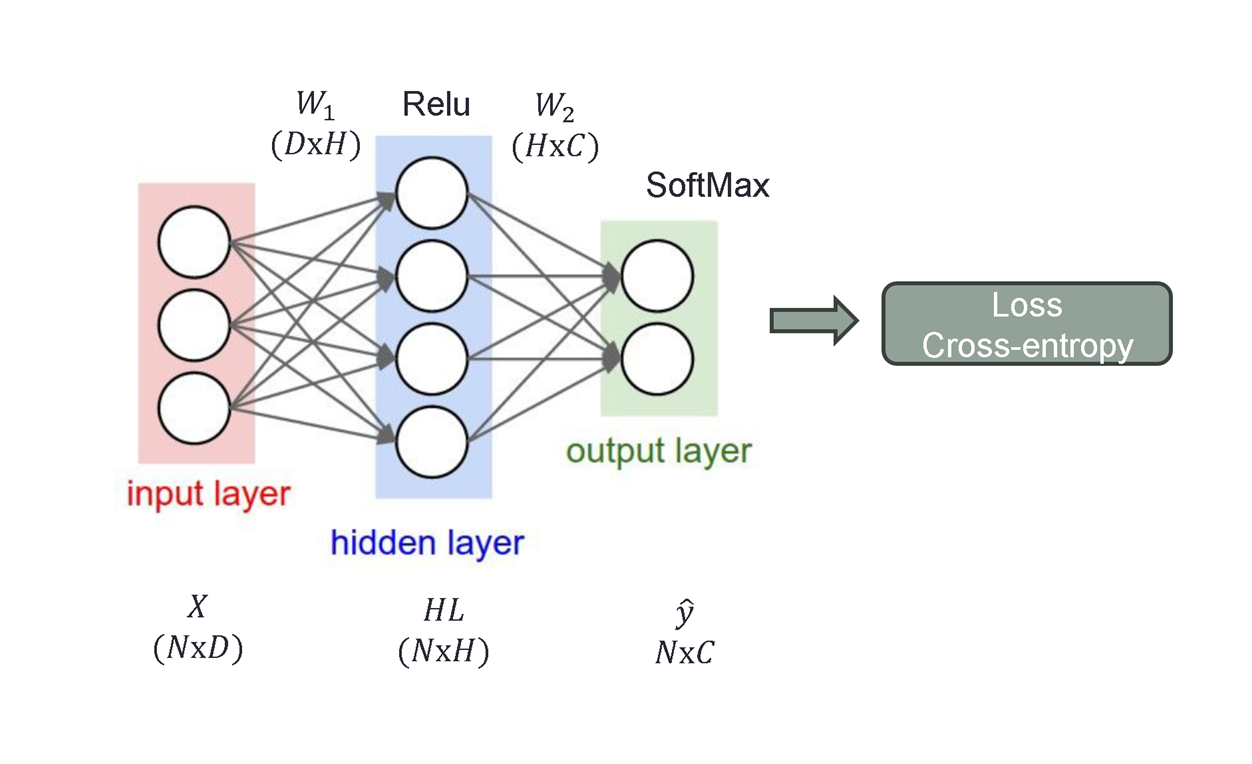

For regularization, the regularization term needs to be added to the loss function as follows:

$$ L(\hat{y}) = L(\hat{y}) + \frac{1}{2} \lambda \cdot ( ||W_2||^2 + ||W_1||^2)  $$

||W_2|| is the Frobenius norm of a matrix, which is the square root of the addition of the matrix's squared entries. So, ||W_2||^2 is $ \sum_{i} \sum_{j} w_{i,j}^2$

Also, the regulation term needs to be added to the gradient of W as:

$$\frac{\partial f(x; W,b)}{\partial W} = \frac{\partial f(x; W,b)}{\partial W} +  \lambda \cdot W $$

# Solver
**[16 pts]** Open the file `cs231n/solver.py` and read through it to familiarize yourself with the API. You also need to implement the `sgd`, `sgd_momentum`, `rmsprop`, and `adam` function in `cs231n/optim.py`. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves about `36%` accuracy on the validation set.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves about 36% #
# accuracy on the validation set.                                            #
##############################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# define an object solver and call the function train 

solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                      'learning_rate': 1e-4,
                    },
                    lr_decay=0.95,
                    num_epochs=5, batch_size=200,
                    print_every=100)
solver.train()

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 1225) loss: 2.303486
(Epoch 0 / 5) train acc: 0.089000; val_acc: 0.084000
(Iteration 101 / 1225) loss: 2.258724
(Iteration 201 / 1225) loss: 2.132084
(Epoch 1 / 5) train acc: 0.234000; val_acc: 0.264000
(Iteration 301 / 1225) loss: 2.062600
(Iteration 401 / 1225) loss: 2.015453
(Epoch 2 / 5) train acc: 0.303000; val_acc: 0.303000
(Iteration 501 / 1225) loss: 1.888966
(Iteration 601 / 1225) loss: 1.956387
(Iteration 701 / 1225) loss: 1.918117
(Epoch 3 / 5) train acc: 0.331000; val_acc: 0.335000
(Iteration 801 / 1225) loss: 1.861359
(Iteration 901 / 1225) loss: 1.763450
(Epoch 4 / 5) train acc: 0.356000; val_acc: 0.356000
(Iteration 1001 / 1225) loss: 1.804042
(Iteration 1101 / 1225) loss: 1.840426
(Iteration 1201 / 1225) loss: 1.735271
(Epoch 5 / 5) train acc: 0.379000; val_acc: 0.366000


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.36 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

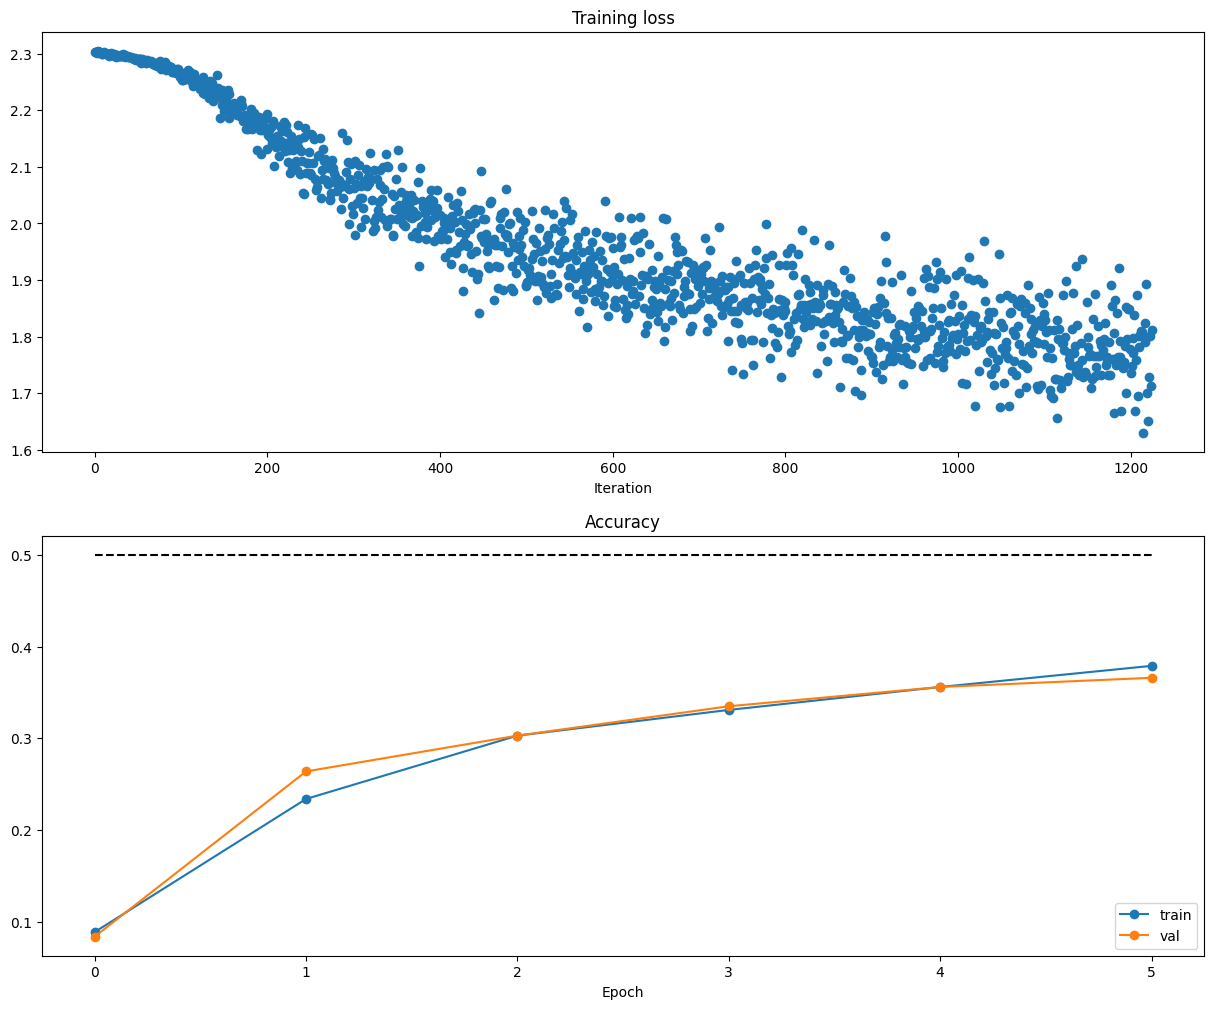

In [10]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

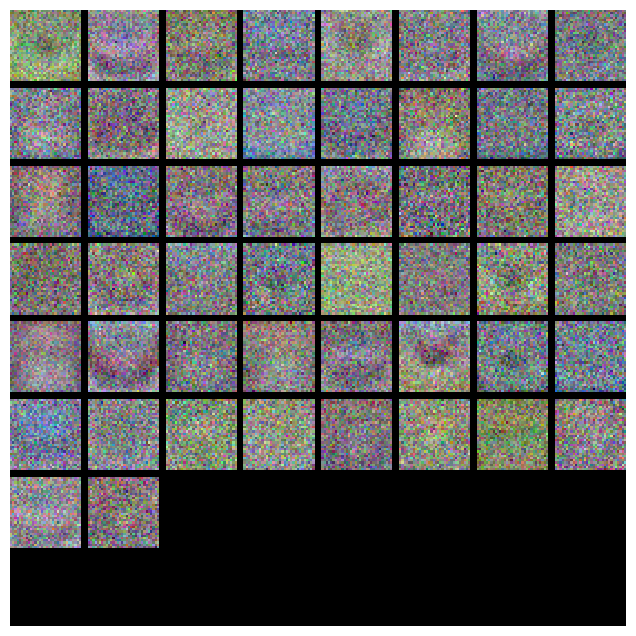

In [11]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

# Tune your hyperparameters


**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. Also try different dropout rates and optimizers (e.g., RSMProp, Adam). You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than or equal to 50% on the validation set. Our best network gets over 52% on the validation set.

**[8 pts]** **Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [12]:
import itertools

best_model = None
best_val = 0
best_params = {}

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_model.                                                          #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on thexs previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

input_size = 32 * 32 * 3
num_classes = 10

# Define the hyperparameters and their possible values
#You can try different values for the hyperparameters
param_grid = {
    'learning_rate': [1e-4],
    'hidden_size': [150],
    'reg': [0.01],
    'optimizer': ['adam'], #'sgd', 'rmsprop', 'sgd_momentum'],
    'dr': [.1]
}

# Generate all possible combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))


# Iterate over each combination and train your model
for params in param_combinations:
    
    # print( params )
    learning_rate = params[0]
    hidden_size = params[1]
    reg = params[2]
    optimizer =  params[3]
    dr =  params[4]
    
    model = TwoLayerNet(input_size, hidden_size, num_classes, p_dr = dr )
    model.reg = reg
    solver = Solver(model, data,
                        update_rule= optimizer,
                        optim_config={
                          'learning_rate': learning_rate,
                        },
                        lr_decay=0.95,
                        num_epochs=10, batch_size=200,
                        print_every=100)
    solver.train()
    
    if solver.val_acc_history[-1] > best_val:
        best_val = solver.val_acc_history[-1]
        best_model = model
        best_params = params
    
    del solver, model

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

(Iteration 1 / 2450) loss: 2.308964
(Epoch 0 / 10) train acc: 0.201000; val_acc: 0.186000
(Iteration 101 / 2450) loss: 1.654768
(Iteration 201 / 2450) loss: 1.633324
(Epoch 1 / 10) train acc: 0.479000; val_acc: 0.467000
(Iteration 301 / 2450) loss: 1.488454
(Iteration 401 / 2450) loss: 1.607708
(Epoch 2 / 10) train acc: 0.508000; val_acc: 0.470000
(Iteration 501 / 2450) loss: 1.466201
(Iteration 601 / 2450) loss: 1.434528
(Iteration 701 / 2450) loss: 1.388064
(Epoch 3 / 10) train acc: 0.583000; val_acc: 0.482000
(Iteration 801 / 2450) loss: 1.434860
(Iteration 901 / 2450) loss: 1.336360
(Epoch 4 / 10) train acc: 0.556000; val_acc: 0.500000
(Iteration 1001 / 2450) loss: 1.402738
(Iteration 1101 / 2450) loss: 1.275082
(Iteration 1201 / 2450) loss: 1.369151
(Epoch 5 / 10) train acc: 0.552000; val_acc: 0.510000
(Iteration 1301 / 2450) loss: 1.290340
(Iteration 1401 / 2450) loss: 1.330145
(Epoch 6 / 10) train acc: 0.593000; val_acc: 0.519000
(Iteration 1501 / 2450) loss: 1.228754
(Iteration

# Test your model!
Run your best model on the validation and test sets. You should achieve at least 50% accuracy on the validation set and the test set.

## The student with the best test accuracy will get a bonus!!!

In [13]:
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())

Validation set accuracy:  0.52


In [14]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.531


## Inline Question 2: 

**[5 pts]** Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$\
1] Train on a larger dataset.\
3] Increase the regularization strength.

$\color{blue}{\textit Your Explanation:}$
- Adding more data allows the model to see a broader range of examples, which helps it generalize better and reduces overfitting.
- Using Regularization helps the model not rely only on specific features. This can help avoid overfitting as it helps deviate away from overly complex models.